## step 0. 머신러닝 프로젝트의 큰 틀

< 머신러닝 프로젝트의 큰 틀 >
1. 모델의 목적 살펴보기, 큰 그림 그리기

2. 사용 데이터 구하기

3. 데이터에 대해 살펴보기 (EDA)

4. 데이터 전처리하기 (알고리즘을 위한 데이터 처리)

5. 모델 선택 및 Train

6. 초기 모델을 발전시키며 모델 수정

7. 솔루션 제시 및 유지 보수

##Step 1. 목적 살펴보기, 큰그림 그리기

주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다.
 이 때 적당한 숙박료를 구하시오.

----------
데이터 소개 : New York City Airbnb Open Data

    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수
---

### 문제 0.Train data와 target data는 무엇이 되어야할지 스스로 정의내린 후에 step 2로 넘어가세요!




```
target data : price(숙박료)를 return해야 함.
train data : 지역, 숙박 일수, 방 개수, 가격 등 중요한 변수들만 담긴 유의미한 data 형성. 이때 전체 데이터에서 일정 비율로 train:test 나누어 주어야 함.
```





## Step 2. 데이터셋 준비하기

In [63]:
#기본적인 Library 불러오기
#아래 Library를 처음보신다면 각각 어떤 역할을 하는지 대략적으로 찾아보세요!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# 구글 드라이브를 연동시키는 작업입니다. 데이터를 구글 드라이브에 올려놓고 불러오는 분들만 사용하시면 됩니다!
# 데이터를 불러오는 다른 방법을 사용하셔도 좋아요!

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 문제 1. Pandas 라이브러리로 csv파일 읽어들이기


In [65]:
PATH = "/content/drive/MyDrive/kubig_ML"

df = pd.read_csv(PATH+"/AB_NYC_2019.csv")

## Step 3. 데이터에 대해 살펴보기 (EDA 및 데이터 기초 통계 분석)


### 문제 2-1. 데이터 구조 살펴보기

In [66]:
# DataFrame에서 제공하는 Method를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info())

print(df.info()) ## 데이터 요약본 (변수명, type 제공)
df.head(10) ## 첫 10행 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


### 문제 2-2. 'room_type' 변수에 어떤 종류가 있는지 살펴보기

In [67]:
# value_counts()

df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

###문제 2-3. 기초 통계량 확인해보기

In [68]:
# describe() - 변수별 데이터 개수, 평균, 표준편차, 5숫자요약

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###문제 3. 각 feature 별로 시각화해서 살펴보기

기본적인 시각화의 방법은 다양합니다! \
각자 다양한 방식으로 전처리전 데이터에 대한 시각화를 진행해보세요! \

**유의미하다고 생각한 변수들에 대해서만 시각화 진행하였습니다.**

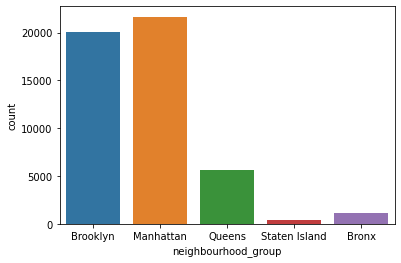

In [69]:
# 지역(동네)
sns.countplot(x="neighbourhood_group",data=df)

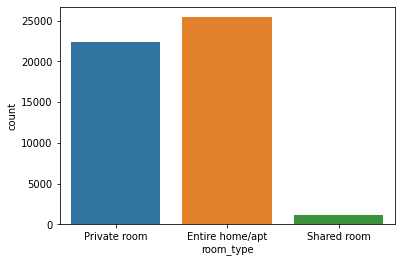

In [70]:
# 방 유형
sns.countplot(x="room_type",data=df)

(array([2.0420e+03, 1.3784e+04, 1.0597e+04, 8.0730e+03, 4.6140e+03,
        3.1480e+03, 2.1220e+03, 1.3110e+03, 7.8500e+02, 4.3100e+02,
        3.6500e+02, 2.5800e+02, 3.3400e+02, 9.8000e+01, 7.4000e+01,
        9.3000e+01, 8.5000e+01, 1.0500e+02, 6.8000e+01, 3.4000e+01,
        6.1000e+01, 2.6000e+01, 3.5000e+01, 2.2000e+01, 3.2000e+01,
        6.1000e+01, 7.0000e+00, 1.6000e+01, 3.0000e+00, 4.0000e+00,
        1.5000e+01, 6.0000e+00, 8.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+01, 1.0000e+00, 2.0000e+00,
        4.0000e+00, 0.0000e+00, 5.0000e+00, 5.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 2.8000e+01]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000., 1040.,
        1080., 1120., 1160., 1200., 1240., 1280., 1320., 1360., 1400.,
        1440., 1480., 1520., 1560.

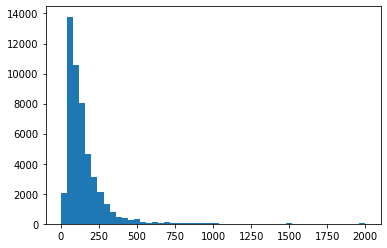

In [71]:
# 가격
plt.hist(df["price"],bins=50,range=[0,2000])

(array([4.1772e+04, 1.5700e+03, 1.0460e+03, 3.9890e+03, 5.1000e+01,
       2.9000e+01, 1.1100e+02, 1.3000e+01, 1.3000e+01, 1.2700e+02]), array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]), <a list of 10 Patch objects>)


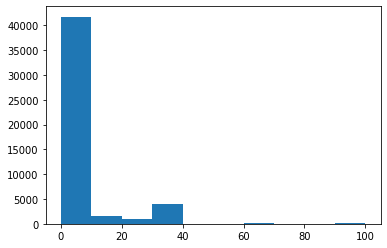

In [72]:
list = df.columns[[10,11,13,14,15]]

# 최소 숙박일수
print(plt.hist(df[list[0]],range=[0,100]))

(array([4.3298e+04, 3.5710e+03, 1.2660e+03, 4.9900e+02, 1.4300e+02,
       6.7000e+01, 3.1000e+01, 1.2000e+01, 3.0000e+00, 5.0000e+00]), array([  0. ,  62.9, 125.8, 188.7, 251.6, 314.5, 377.4, 440.3, 503.2,
       566.1, 629. ]), <a list of 10 Patch objects>)


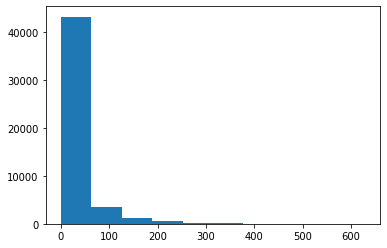

In [73]:
# 리뷰 건수
print(plt.hist(df[list[1]]))

(array([1.2699e+04, 5.2920e+03, 3.2040e+03, 3.0850e+03, 1.8230e+03,
       1.5950e+03, 1.7780e+03, 1.2920e+03, 1.1900e+03, 1.0360e+03,
       1.0990e+03, 7.7400e+02, 6.6400e+02, 6.7800e+02, 4.7500e+02,
       4.0500e+02, 3.6100e+02, 2.4600e+02, 1.9100e+02, 1.6500e+02,
       1.4200e+02, 1.0400e+02, 7.2000e+01, 8.4000e+01, 5.2000e+01,
       6.8000e+01, 4.4000e+01, 2.9000e+01, 2.5000e+01, 2.3000e+01,
       2.2000e+01, 1.9000e+01, 1.6000e+01, 1.7000e+01, 9.0000e+00,
       9.0000e+00, 5.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00,
       6.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00, 8.0000e+00,
       0.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00]), array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
        3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
        6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
        9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. , 12.3, 12.6, 12.9,
       13.2, 13.5, 13.8, 14.1, 14.4

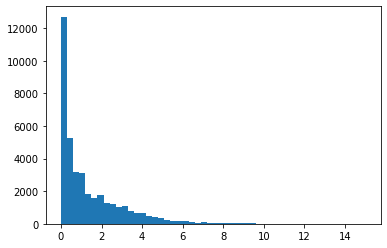

In [74]:
# 월별 리뷰 건수
print(plt.hist(df[list[2]],bins=50,range=[0,15]))

(array([47191.,   551.,   370.,   224.,     0.,     0.,     0.,   232.,
           0.,   327.]), array([  1. ,  33.6,  66.2,  98.8, 131.4, 164. , 196.6, 229.2, 261.8,
       294.4, 327. ]), <a list of 10 Patch objects>)


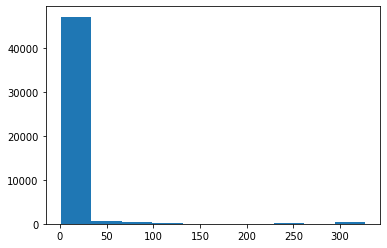

In [75]:
print(plt.hist(df[list[3]]))

(array([23596.,  3304.,  3245.,  1707.,  2733.,  1684.,  1920.,  2090.,
        2787.,  5829.]), array([  0. ,  36.5,  73. , 109.5, 146. , 182.5, 219. , 255.5, 292. ,
       328.5, 365. ]), <a list of 10 Patch objects>)


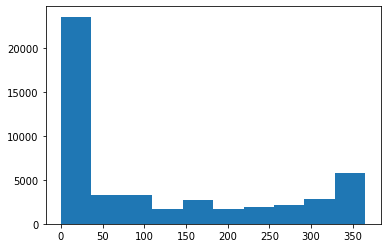

In [76]:
print(plt.hist(df[list[4]]))

### 문제 4. 각 feature 별로 결측치가 있는지 살펴보기

In [77]:
# 마찬가지로 결측치(비어있음. 누락되어 있음)를 찾는 방법도 다양합니다. 가장 일반적으로 사용하는 method를 힌트로 첨부했습니다.
# 추후 프로젝트를 진행하시면서 스스로 다양한 방식을 사용해보세요!
# { isna().sum(), info() }

df.isna().sum() # 변수별 결측치의 개수

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 문제 5. reviews_per_month와 price의 scatter plot 그리기


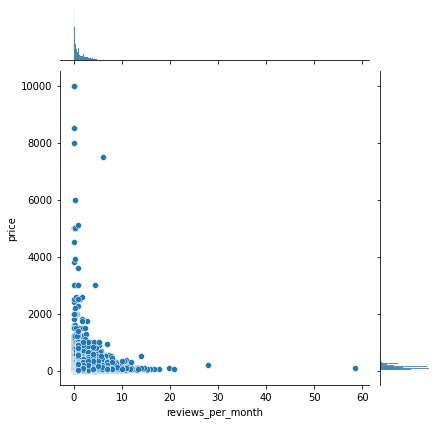

In [78]:
# 어떤 방법을 쓰셔도 상관없습니다.
sns.jointplot(x=df["reviews_per_month"],y=df["price"],kind='scatter')

### 문제 6. 수치형 데이터와 Price의 상관성 분석하기

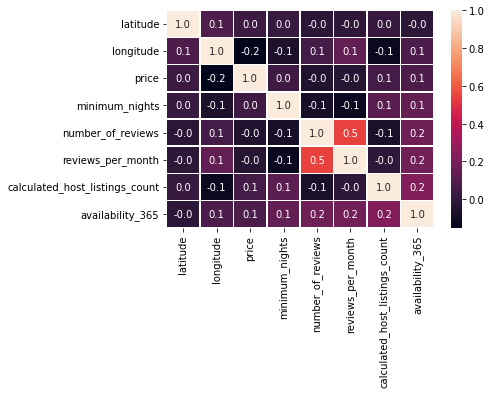

In [79]:
df_drop = df.drop(["id","host_id"],axis=1)
sns.heatmap(df_drop.corr(), annot=True, linewidths=0.5, fmt="0.1f")
# 사실 위도와 경도 변수(위치 데이터)도 상관관계를 굳이 파악할 이유는 없다고 생각합니다.

### 문제 7. 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

In [80]:
# 위 문제는 3번에서 다루었음으로 스킵하겠습니다.

####문제 7-1. neighbourhood_group 변수와 price 사이의 분포를 boxplot으로 그려보세요.

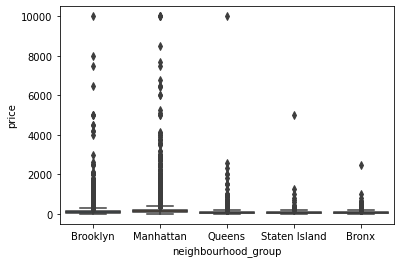

In [81]:
sns.boxplot(x=df["neighbourhood_group"],y=df["price"])
plt.show()
# boxplot의 scale 조정(?)

####문제 7-2. room_type 변수와 price 사이의 분포를 boxplot으로 그려보세요.

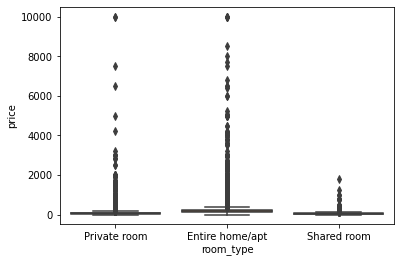

In [82]:
sns.boxplot(x='room_type', y='price', data=df)
# boxplot의 scale 조정(?)

## Step 4-1. 데이터 전처리하기

### 문제 8-1. 결측치 처리하기

In [83]:
# 각 컬럼을 분석하여 미기입/오기입된 데이터 확인하기
# Hint) 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인
# fill(), dropna() 등으로 미기입된 데이터를 처리하기
# 결측치는 개인적 판단에 따라 drop하셔도 되고, 특정 값으로 채우셔도 됩니다!

# 결측치가 포함된 변수는 앞서 확인한 결과 총 4개로, [name,host_name,last_review,reviews_per_month]입니다.

In [84]:
# name: 숙소의 이름 변수임으로 기본 중요 정보입니다. 따라서 결측치들은 제거해줍니다.

df = df[df["name"].notna()]
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [85]:
# host_name: 숙소 주인의 경우 사실 그렇게 중요한 정보는 아닌것 같습니다. 그냥 임의의 string으로 결측치를 채워줍니다.

df = df.fillna({'host_name':'missing'})
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [86]:
# last_review: 마지막 리뷰일자. 이 feature도 숙박료 산출에 그리 중요하지는 않습니다. 임의의 string으로 결측치를 채워줍니다.

df = df.fillna({'last_review':'missing'})
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [87]:
# reviews_per_month: 월별 리뷰건수. 전체 리뷰건수와 큰 연관이 있을 거라고 생각했습니다.
# 월별 리뷰건수가 누락된 행들의 전체 리뷰 건수 값들을 살펴봅니다.

df_new = df.loc[df.reviews_per_month.isna(),["number_of_reviews"]]==0
df_new.all() # 전체 리뷰 건수가 모두 0임.

number_of_reviews    True
dtype: bool

In [88]:
# 전체 리뷰 건수가 0이기에 월별 리뷰건수도 누락된 것이었습니다. 따라서 결측치들도 다 0으로 채워줍니다.
df = df.fillna({'reviews_per_month':0})
df.isna().sum() # 결측치가 모두사라진것을 확인할 수 있습니다.

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### 문제 8-2. 학습에 필요없는 column이라고 판단된다면 제거하기

In [89]:
# 'id', 'name', 'host_name', 'latitude', 'longitude' feature를 제거해보세요!
# 각자 판단하여 위 column을 살려서 활용하고, 다른 Column을 제거하셔도 됩니다!
# drop()

df = df.drop(["id","host_id","host_name","latitude","longitude"],axis=1)
df.head(10) # 중요 feature만 남은 것을 확인할 수 있습니다.

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,missing,0.00,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,2017-10-05,0.40,1,0
7,Large Furnished Room Near B'way,Manhattan,Hell's Kitchen,Private room,79,2,430,2019-06-24,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,Private room,79,2,118,2017-07-21,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,Manhattan,Chinatown,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


### 문제 9. 아웃라이어를 제거하고 통계 재분석하기

In [90]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기
# 예시 코드를 제공하겠습니다!
# 기본 코드니까 이게 반드시 정답인건 아니고, 이런식으로 파이썬으로 데이터 전처리를 한다 정도로만 보시면 될 것 같아요

In [91]:
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
print(p1, p2)

355.0 26.0


In [92]:
df = df[(df['price'] < p1) & (df['price'] > p2)]

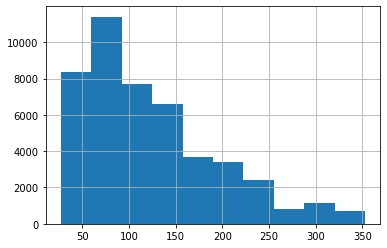

In [93]:
df['price'].hist()

## Step 4-2. 데이터 전처리하기 

### 문제 10. get_dummies를 이용한 범주형 데이터 전처리

In [95]:
# 어떤 column이 범주형이고, 어떤 column이 수치형인지 스스로 판단해보세요
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46176 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            46176 non-null  object 
 1   neighbourhood_group             46176 non-null  object 
 2   neighbourhood                   46176 non-null  object 
 3   room_type                       46176 non-null  object 
 4   price                           46176 non-null  int64  
 5   minimum_nights                  46176 non-null  int64  
 6   number_of_reviews               46176 non-null  int64  
 7   last_review                     46176 non-null  object 
 8   reviews_per_month               46176 non-null  float64
 9   calculated_host_listings_count  46176 non-null  int64  
 10  availability_365                46176 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.2+ MB


neightbourhood_group, neighbourhood, room_type이 범주형 변수다. \
price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365는 수치형 변수다.

In [96]:
# 예시 코드를 제공하겠습니다.
# 코드 그 자체보다 왜 범주형 데이터를 따로 전처리해줘야하는지에 집중해서 공부하세요!

X_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type']]
X_cat = pd.get_dummies(X_cat)


### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
# 예시 코드를 제공하겠습니다.
# 마찬가지로 왜 수치형 데이터를 전처리 해줬을지에 대해 생각해보세요!

In [100]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df.drop(['name','neighbourhood_group', 'neighbourhood', 'room_type', 'price', 
                 'last_review'], axis=1)

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)


In [101]:
# 범주형 데이터와 수치형 데이터를 단순히 합치는 작업
X = pd.concat([X_scaled, X_cat], axis=1)

# target 변수인 y를 지정해준 작업
y = df['price']

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [102]:
from sklearn.model_selection import train_test_split

In [104]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=22)

## Step 5. 모델 선택 및 Train

### 문제 14. Regression 모델 종류에 대해 검색해보고 하나 선택하기

In [110]:
# 아직 모델에 대해 배우지 않았기 때문에 크게 신경쓰지 않으셔도 됩니다!
# 단지 '모델 선택 및 Train 단계가 있다.'라는걸 배우기 위한 과정입니다.
# 기존에 알고 계시는 어떤 모델을 사용하셔도 상관없습니다.
# 기존에 알고 계신 모델이 하나도 없다면 구글링 후 하나 선택하시면 됩니다.

In [106]:
from sklearn.ensemble import RandomForestRegressor
model_reg = RandomForestRegressor()
model_reg.fit(X_train,y_train)

RandomForestRegressor()

### 문제 15. 선택한 모델 구현 및 데이터 학습 시키기

In [112]:
print(model_reg.score(X_train, y_train))

print(model_reg.score(X_test, y_test))

0.8985107282286043
0.53941606727736


### 문제 16. 모델 학습 결과 평가하기

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [125]:
# Predict를 수행하고 mean_absolute_error, mse 결과 출력하기
pred = model_reg.predict(X_test)

# MAE
mae = mean_absolute_error(pred,y_test)
print("Mean absolute error:" + str(mae))

# MSE
mse = mean_squared_error(pred,y_test)
print("Mean squared error:"+str(mse))

Mean absolute error:34.54106465707212
Mean squared error:2398.003922496796


## Step 6. 초기 모델을 발전시키며 모델 수정


### 문제 17. 실제 값과 추측 값의 Scatter plot 시각화하기


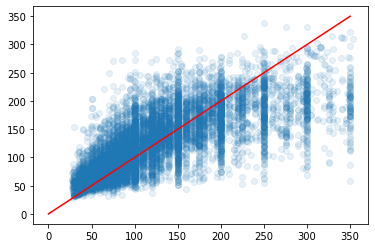

In [126]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# 예시 코드를 드리겠습니다.
# 학습 이후 이런식으로 모델의 결과를 살펴보는구나... 정도의 큰 흐름을 중심으로 이해해주세요

plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0,350], [0, 350], 'r-')

### 문제 18. 에러 값의 히스토그램 확인하기


In [127]:
# 예시코드를 제공하겠습니다.
# 위와 마찬가지로 큰흐름을 이해하는걸 목적으로 해주세요.
# 지금 단계에서 세부 함수나 코드를 모른다고해서 스트레스 받으실 필요 전혀 없습니다.

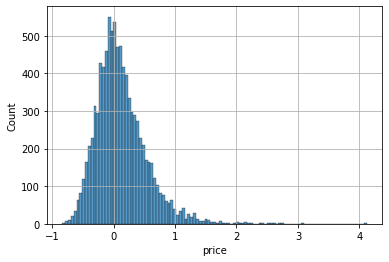

In [128]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test
sns.histplot(err)
plt.grid()

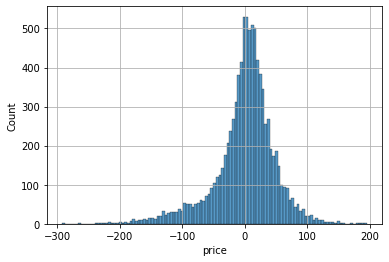

In [129]:
# err의 히스토그램으로 에러 히스토그램 확인하기
err = pred - y_test
sns.histplot(err)
plt.grid()

# 마무리

## 과제 마무리

고생하셨습니다!

여러번 강조했지만 오늘 과제는 세부적인 함수보다는 기계가 어떻게 학습하는지 그 과정과 흐름을 익히시는데 초점을 맞추시면 됩니다.

흐름에 대해 이해한 후 코드와 문법에 대해서 스스로 공부하시면 됩니다.

오늘 쓰인 라이브러리나 method, 함수들은 어차피 계속 만나게될거라 방학때 복습해놓는게 나중에도 편해요!

-


## 분반을 시작하면서




**머신러닝 분반을 준비하면서 알려드려야할게 많은데, 주어진 2달의 기간이 너무나도 짧습니다.**

-



수리적 이해가 무엇보다 중요해서 정규 세션에서는 수학을 위주로 전달되긴하지만,

**초심자 입장에서 직관적인 이해, 실무적인 코딩이 더 도움된다는것도 겪어봐서 잘 알고있습니다**

-



그래서 마음같아서는 주 2~3회 세션을 잡아서 수리적 이해와 실무적 코딩, 직관적 이해를 모두 전달해드리고 싶지만, 여러분이 학회 활동만 하지 않는다는걸 알고있어요...

-

방학이 지나고 학기가 시작되면 17기 여러분들도 학회내에서 프로젝트를 진행하게 됩니다. 

목요일 정규 세션에서 실무적인 코딩을 집중적으로 다루지않는만큼, 학기가 시작되었을때 헤매지않게 과제는 오늘처럼 코딩 위주로 내어드릴 생각입니다.

-

머신러닝을 처음 접하신분들은 처음보는 함수와 파이썬 문법 앞에서 헤매는게 지극히 정상적이고 당연한 현상입니다.

궁금한게 생기시면 언제든 연락주세요!

